In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [43]:
# Load the data
df = pd.read_csv('../dataset/lending_club_loan_EDA.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.00,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.00,Not Verified,2015-01-01,Fully Paid,vacation,26.24,1990-06-01,16.00,0,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.00,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,2015-01-01,Fully Paid,debt_consolidation,22.05,2004-07-01,17.00,0,20131.00,53.30,27.00,f,INDIVIDUAL,1.00,0.00,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.00,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.00,Source Verified,2015-01-01,Fully Paid,credit_card,12.79,2007-08-01,13.00,0,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.00,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.00,Not Verified,2014-11-01,Fully Paid,credit_card,2.60,2006-09-01,6.00,0,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.00,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,2013-04-01,Charged Off,credit_card,33.95,1999-03-01,13.00,0,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\nGreggshire, VA 11650"


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  dti                   396030 non-null  float64
 15  

**- Categorical** 
- <u>Ordinal:</u> grade, sub_grade, emp_length, term
- <u>Nominal:</u> home_ownership, verification_status, purpose, initial_list_status, application_type

**- Numerical**
- <u>Discrete:</u> loan_amnt, int_rate, installment, annual_inc, dti, revol_bal, revol_util
- <u>Continuous:</u> total_acc, open_acc, pub_rec, pub_rec_bankruptcies, mort_acc

**- Mix type:** emp_title, address

**- Date:** issue_d, earliest_cr_line

**Target:** loan_status

# 🔄 Data PreProcessing

**Section Goals:** 
> - Remove or fill any missing data. 
> - Remove unnecessary or repetitive features. 
> - Convert categorical string features to dummy variables.

In [45]:
# The shape of the data
print(f'The data has {df.shape[0]:,} rows and {df.shape[1]:,} columns.')

The data has 396,030 rows and 26 columns.


In [46]:
# Missing values
for column in df.columns:
    if df[column].isna().sum() != 0:
        missing = df[column].isna().sum()
        portion = (missing / df.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '22927' ==> '5.789%'
'emp_length': number of missing values '18301' ==> '4.621%'
'revol_util': number of missing values '276' ==> '0.070%'
'mort_acc': number of missing values '37795' ==> '9.543%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


`emp_title`

In [47]:
# Count the number of unique values in emp_title
print(f'The number of unique values in emp_title: {df.emp_title.nunique()}')

The number of unique values in emp_title: 173105


In [48]:
# Hard to use this column for one-hot encoding, so we will drop it
df.drop('emp_title', axis=1, inplace=True)

`emp_length`

In [49]:
# Count the number of unique values in emp_length
print(f'The number of unique values in emp_length: {df.emp_length.nunique()}')

The number of unique values in emp_length: 11


In [50]:
for year in df.emp_length.unique():
    print(f"{year} in this position:")
    print(f"{df[df.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')

10+ years in this position:
loan_status
Fully Paid    0.82
Charged Off   0.18
Name: proportion, dtype: float64
4 years in this position:
loan_status
Fully Paid    0.81
Charged Off   0.19
Name: proportion, dtype: float64
< 1 year in this position:
loan_status
Fully Paid    0.79
Charged Off   0.21
Name: proportion, dtype: float64
6 years in this position:
loan_status
Fully Paid    0.81
Charged Off   0.19
Name: proportion, dtype: float64
9 years in this position:
loan_status
Fully Paid    0.80
Charged Off   0.20
Name: proportion, dtype: float64
2 years in this position:
loan_status
Fully Paid    0.81
Charged Off   0.19
Name: proportion, dtype: float64
3 years in this position:
loan_status
Fully Paid    0.80
Charged Off   0.20
Name: proportion, dtype: float64
8 years in this position:
loan_status
Fully Paid    0.80
Charged Off   0.20
Name: proportion, dtype: float64
7 years in this position:
loan_status
Fully Paid    0.81
Charged Off   0.19
Name: proportion, dtype: float64
5 years in this 

In [51]:
# Charge off rates are extremely similar across all employment lengths. So we are going to drop the emp_length column.
df.drop('emp_length', axis=1, inplace=True)

`mort_acc`

In [52]:
print(df.mort_acc.value_counts())
print(df.mort_acc.isna().sum())

mort_acc
1.00    218458
0.00    139777
Name: count, dtype: int64
37795


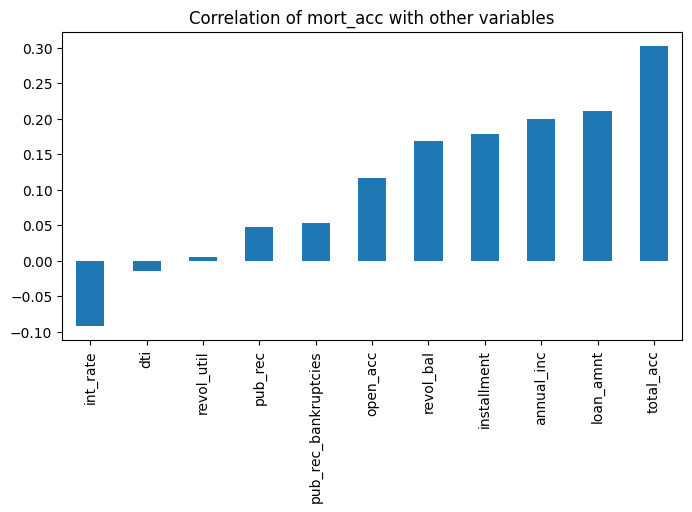

In [53]:
mort_acc_corr = df.corr(numeric_only=True)['mort_acc'].sort_values()
# plot the mort_acc_corr
plt.figure(figsize=(8, 4))
mort_acc_corr.drop('mort_acc').plot(kind='bar')
plt.title('Correlation of mort_acc with other variables')
plt.show()



In [54]:
# Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:

total_acc_avg = df.groupby(by='total_acc')
total_acc_avg.mort_acc.mean()



total_acc
2.00     0.00
3.00     0.05
4.00     0.06
5.00     0.09
6.00     0.12
         ... 
124.00   1.00
129.00   1.00
135.00   1.00
150.00   1.00
151.00   0.00
Name: mort_acc, Length: 118, dtype: float64

In [55]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg['mort_acc'].mean()[total_acc].round()
    else:
        return mort_acc

df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [56]:
print(df.mort_acc.value_counts())
print(df.mort_acc.isna().sum())

mort_acc
1.00    242794
0.00    153236
Name: count, dtype: int64
0


`revol_util` & `pub_rec_bankruptcies`

In [57]:
# Missing values
for column in df.columns:
    if df[column].isna().sum() != 0:
        missing = df[column].isna().sum()
        portion = (missing / df.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'revol_util': number of missing values '276' ==> '0.070%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [58]:
# These two features have missing data points, but they account for less than 0.5% of the total data. So we are going to remove the rows that are missing those values in those columns with dropna().
df.dropna(inplace=True)
df.shape 

(395219, 24)

> **Categorical Variables and Dummy Variables**

In [59]:
print([column for column in df.columns if df[column].dtype == object])

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']


`Term`

In [60]:
df.term.value_counts()

term
36 months    301247
60 months     93972
Name: count, dtype: int64

In [61]:
term_dict = {' 36 months': 36, ' 60 months': 60}
df['term'] = df['term'].map(term_dict)
df.term.value_counts()

term
36    301247
60     93972
Name: count, dtype: int64

`grade` & `sub_grade`

In [62]:
# grade is part of sub_grade, so we are going to drop the grade column
df.drop('grade', axis=1, inplace=True)

In [63]:
df.sub_grade.value_counts()

sub_grade
B3    26611
B4    25558
C1    23609
C2    22541
B2    22457
B5    22046
C3    21178
C4    20232
B1    19140
A5    18500
C5    18215
D1    15947
A4    15763
D2    13916
D3    12196
D4    11625
A3    10537
A1     9717
D5     9680
A2     9539
E1     7906
E2     7410
E3     6196
E4     5354
E5     4561
F1     3530
F2     2756
F3     2277
F4     1782
F5     1395
G1     1057
G2      752
G3      552
G4      371
G5      313
Name: count, dtype: int64

In [64]:
# Ordinal encoding for sub_grade
sub_grade_dict = {'A1': 1, 'A2': 2, 'A3': 3, 'A4': 4, 'A5': 5,
                  'B1': 6, 'B2': 7, 'B3': 8, 'B4': 9, 'B5': 10,
                  'C1': 11, 'C2': 12, 'C3': 13, 'C4': 14, 'C5': 15,
                  'D1': 16, 'D2': 17, 'D3': 18, 'D4': 19, 'D5': 20,
                  'E1': 21, 'E2': 22, 'E3': 23, 'E4': 24, 'E5': 25,
                  'F1': 26, 'F2': 27, 'F3': 28, 'F4': 29, 'F5': 30,
                  'G1': 31, 'G2': 32, 'G3': 33, 'G4': 34, 'G5': 35}
df['sub_grade'] = df['sub_grade'].map(sub_grade_dict)
df.sub_grade.value_counts().sort_index()


sub_grade
1      9717
2      9539
3     10537
4     15763
5     18500
6     19140
7     22457
8     26611
9     25558
10    22046
11    23609
12    22541
13    21178
14    20232
15    18215
16    15947
17    13916
18    12196
19    11625
20     9680
21     7906
22     7410
23     6196
24     5354
25     4561
26     3530
27     2756
28     2277
29     1782
30     1395
31     1057
32      752
33      552
34      371
35      313
Name: count, dtype: int64

`verification_status`, `purpose`, `initial_list_status`, `application_type`, `home_ownership`

In [65]:
dummies = ['verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership']
print(f'The number of unique values in each column: {[(column, df[column].nunique()) for column in dummies]}')

The number of unique values in each column: [('verification_status', 3), ('purpose', 14), ('initial_list_status', 2), ('application_type', 3), ('home_ownership', 4)]


In [66]:
df = pd.get_dummies(df, columns=dummies, drop_first=True)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT'],
      dtype='object')

`address`

In [67]:
# We are going to feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.
df.address.head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [68]:
df['zip_code'] = df['address'].apply(lambda x: x[-5:])
df.zip_code.value_counts()

zip_code
70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: count, dtype: int64

In [69]:
df = pd.get_dummies(df, columns=['zip_code'], drop_first=True)
df.drop('address', axis=1, inplace=True)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'zip_code_05113', 'zip_code_11650', 'zip_code_22690', 'zip_code_29597',
       'zip_code_30723', 'zip_code_48052', 'zip_code_70466', 'zip_code_86630',
       'zip_cod

`issue_d`

In [70]:
# issue_d is data leakage, so we are going to drop it, because it is data that wouldn't be available when we are using the model.
df.drop('issue_d', axis=1, inplace=True)

`earliest_cr_line`

In [71]:
# This appears to be a historical time stamp feature. Extract the year from this feature using a .apply() function, then convert it to a numeric feature.
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: x.year)
df.drop('earliest_cr_line', axis=1, inplace=True)
df.earliest_cr_year.value_counts()

earliest_cr_year
2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: count, Length: 65, dtype: int64

`loan_status`

In [72]:
df['loan_status'].value_counts()

loan_status
Fully Paid     317696
Charged Off     77523
Name: count, dtype: int64

In [73]:
# Check the data types of the columns
dict_loan_status = {'Fully Paid': 1, 'Charged Off': 0}
df['loan_status'] = df['loan_status'].map(dict_loan_status)
df['loan_status'].value_counts()

loan_status
1    317696
0     77523
Name: count, dtype: int64

In [74]:
df.dtypes

loan_amnt                              float64
term                                     int64
int_rate                               float64
installment                            float64
sub_grade                                int64
annual_inc                             float64
loan_status                              int64
dti                                    float64
open_acc                               float64
pub_rec                                  int64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
mort_acc                               float64
pub_rec_bankruptcies                   float64
verification_status_Source Verified       bool
verification_status_Verified              bool
purpose_credit_card                       bool
purpose_debt_consolidation                bool
purpose_educational                       bool
purpose_home_improvement                  bool
purpose_house

In [75]:
# Convert the data type of the columns to float
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(float)
        

In [76]:
df.dtypes

loan_amnt                              float64
term                                     int64
int_rate                               float64
installment                            float64
sub_grade                                int64
annual_inc                             float64
loan_status                              int64
dti                                    float64
open_acc                               float64
pub_rec                                  int64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
mort_acc                               float64
pub_rec_bankruptcies                   float64
verification_status_Source Verified    float64
verification_status_Verified           float64
purpose_credit_card                    float64
purpose_debt_consolidation             float64
purpose_educational                    float64
purpose_home_improvement               float64
purpose_house

In [77]:
print(f"Data shape before removing duplicate rows: {df.shape}")

# Remove Duplicate Rows
df.drop_duplicates(inplace=True)

# Remove nan values
df.dropna(inplace=True)

print(f"Data shape after removing duplicate rows: {df.shape}")

Data shape before removing duplicate rows: (395219, 46)
Data shape after removing duplicate rows: (395219, 46)


In [78]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,earliest_cr_year
0,10000.00,36,11.44,329.48,9,117000.00,1,26.24,16.00,0,36369.00,41.80,25.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1990
1,8000.00,36,11.99,265.68,10,65000.00,1,22.05,17.00,0,20131.00,53.30,27.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2004
2,15600.00,36,10.49,506.97,8,43057.00,1,12.79,13.00,0,11987.00,92.20,26.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2007
3,7200.00,36,6.49,220.65,2,54000.00,1,2.60,6.00,0,5472.00,21.50,13.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2006
4,24375.00,60,17.27,609.33,15,55000.00,0,33.95,13.00,0,24584.00,69.80,43.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1999


In [79]:
df.loan_status.value_counts()

loan_status
1    317696
0     77523
Name: count, dtype: int64

In [80]:
# Write the cleaned data to a new csv file
df.to_csv('../dataset/lending_club_loan_cleaned.csv', index=False)